In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sp
import seaborn as sns
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.model_selection import KFold, cross_val_score

%matplotlib inline
np.random.seed(42)
df = pd.read_csv("40403863_features.csv")

In [25]:
# section 2.1
head = df.head(8)
tail = df.tail(68)
new_df = pd.concat([head, tail])
new_df["classifier"] = new_df["label"]
new_df["classifier"] = new_df["classifier"].map({"a": 1,"j": 1, "smiley": 2, "sad": 3, "xclaim": 4})

for i in range(0,7):
    k_neighbours = 2*i + 1
    knn = KNeighborsClassifier(n_neighbors=k_neighbours)
    x_train = new_df[["connected_areas", "aspect_ratio", "no_neigh_vert", "densest_quadrant"]]
    y_train = new_df["classifier"]
    knn.fit(x_train, y_train)
    print(knn.score(x_train, y_train))

1.0
0.8157894736842105
0.8157894736842105
0.7631578947368421
0.7236842105263158
0.6973684210526315
0.6973684210526315


K Value = 1
Fold 1 : 0.5
Fold 2 : 0.4666666666666667
Fold 3 : 0.9333333333333333
Fold 4 : 0.7333333333333333
Fold 5 : 0.9333333333333333
Average cross-validated accuracy: 0.7133333333333333

K Value = 3
Fold 1 : 0.5625
Fold 2 : 0.6
Fold 3 : 0.8666666666666667
Fold 4 : 0.7333333333333333
Fold 5 : 0.8666666666666667
Average cross-validated accuracy: 0.7258333333333333

K Value = 5
Fold 1 : 0.5
Fold 2 : 0.5333333333333333
Fold 3 : 0.6666666666666666
Fold 4 : 0.6666666666666666
Fold 5 : 0.9333333333333333
Average cross-validated accuracy: 0.6599999999999999

K Value = 7
Fold 1 : 0.625
Fold 2 : 0.5333333333333333
Fold 3 : 0.6666666666666666
Fold 4 : 0.7333333333333333
Fold 5 : 0.8
Average cross-validated accuracy: 0.6716666666666666

K Value = 9
Fold 1 : 0.6875
Fold 2 : 0.4666666666666667
Fold 3 : 0.6
Fold 4 : 0.6666666666666666
Fold 5 : 0.7333333333333333
Average cross-validated accuracy: 0.6308333333333334

K Value = 11
Fold 1 : 0.6875
Fold 2 : 0.7333333333333333
Fold 3 : 0.6
Fold 4 : 0.6

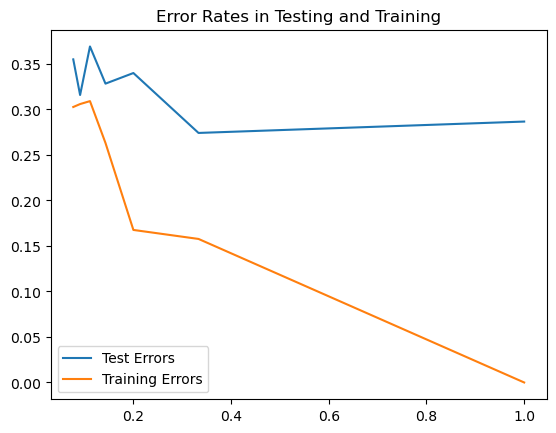

In [38]:
# section 2.2, section 2.3 and section 2.4

kfolds = 5
kf = KFold(n_splits = kfolds, shuffle=True, random_state=42)
cm_array = []
max_acc = 0
max_acc_index = 0
points = []

for i in range(0,7):
    k_value = 2*i + 1
    print("K Value =", k_value)
    accuracy_sum = 0
    train_accuracy_sum = 0
    inc = 1
    k_neighbours = 2*i + 1
    knn = KNeighborsClassifier(n_neighbors=k_neighbours)
    
    for train_index, test_index in kf.split(new_df):
        train_data = new_df.iloc[train_index]
        test_data = new_df.iloc[test_index]
        x_train = train_data[["connected_areas", "aspect_ratio", "no_neigh_vert", "densest_quadrant"]]
        y_train = train_data["classifier"]
        x_test = test_data[["connected_areas", "aspect_ratio", "no_neigh_vert", "densest_quadrant"]]
        y_test = test_data["classifier"]
        
        knn.fit(x_train, y_train)

        y_pred = knn.predict(x_test)
        cm_array.append(confusion_matrix(y_test, y_pred))
        
        accuracy = knn.score(x_test, y_test)
        accuracy_sum += accuracy
        train_accuracy = knn.score(x_train, y_train)
        train_accuracy_sum += train_accuracy
        
        print("Fold", inc, ":", accuracy)
        inc += 1
    avg_acc = accuracy_sum/kfolds
    avg_train_acc = train_accuracy_sum/kfolds
    points.append([1-avg_acc, 1-avg_train_acc, 1/k_value])
    print("Average cross-validated accuracy:", accuracy_sum/kfolds)
    if avg_acc > max_acc:
        max_acc = avg_acc
        max_acc_index = i
    print()

# section 2.3
best_k = max_acc_index*2 + 1
print("Best K-Value:", best_k)
print("Confusion Matrix:")
cm_sum = np.zeros((4,4))
for x in range(0, 5):
    cm_sum += cm_array[best_k * 5 + x]
print(cm_sum)

# section 2.4
y_plot = []
x_plot = []
for i in range(0,7):
    x_plot.append(points[i][2])
    y_plot.append(points[i][0])
plt.plot(x_plot, y_plot, label="Test Errors")
y_plot = []
for i in range(0,7):
    y_plot.append(points[i][1])
plt.plot(x_plot, y_plot, label="Training Errors")
plt.legend(loc="lower left")
plt.title("Error Rates in Testing and Training")
plt.show()